<a href="https://www.kaggle.com/code/veronicasngh/nse-stock-market-analysis?scriptVersionId=188352318" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/nse-stock-historical-price-data/nse_all_stock_data (1).csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **DATA PREPROCESSING AND EXPLORATORY DATA ANALYSIS**

**LOADING AND CLEANING THE DATASET**

In [3]:
df=pd.read_csv("/kaggle/input/nse-stock-historical-price-data/nse_all_stock_data (1).csv")
df.head()

,Date,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,...,COOLCAPS,ALLETEC,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
0,1991-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1991-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1991-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1991-01-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1991-01-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(8470, 1418)

* **Handling missing values**

In [5]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

In [6]:
df = df.apply(pd.to_numeric, errors='coerce')
df = df.interpolate(method='linear').ffill().bfill()
print(df.isnull().sum())

RELIANCE      0
TCS           0
HDFCBANK      0
ICICIBANK     0
BHARTIARTL    0
             ..
DONEAR        0
CAREERP       0
INTLCONV      0
SHREEPUSHK    0
PRITIKAUTO    0
Length: 1417, dtype: int64


In [7]:
df.head()

,RELIANCE,TCS,HDFCBANK,ICICIBANK,BHARTIARTL,SBIN,INFY,LICI,ITC,HINDUNILVR,...,COOLCAPS,ALLETEC,20MICRONS,VIKASECO,ORIENTBELL,DONEAR,CAREERP,INTLCONV,SHREEPUSHK,PRITIKAUTO
Date,,,,,,,,,,,,,,,,,,,,,
1991-01-02,14.691803,39.700001,2.98,25.127272,15.681876,18.82324,0.796679,875.25,5.583333,61.805,...,NaN,NaN,16.775,2.502025,69.550003,214.649994,660.0,73.25,63.049999,18.15
1991-01-03,14.691803,39.700001,2.98,25.127272,15.681876,18.82324,0.796679,875.25,5.583333,61.805,...,NaN,NaN,16.775,2.502025,69.550003,214.649994,660.0,73.25,63.049999,18.15
1991-01-04,14.691803,39.700001,2.98,25.127272,15.681876,18.82324,0.796679,875.25,5.583333,61.805,...,NaN,NaN,16.775,2.502025,69.550003,214.649994,660.0,73.25,63.049999,18.15
1991-01-07,14.691803,39.700001,2.98,25.127272,15.681876,18.82324,0.796679,875.25,5.583333,61.805,...,NaN,NaN,16.775,2.502025,69.550003,214.649994,660.0,73.25,63.049999,18.15
1991-01-08,14.691803,39.700001,2.98,25.127272,15.681876,18.82324,0.796679,875.25,5.583333,61.805,...,NaN,NaN,16.775,2.502025,69.550003,214.649994,660.0,73.25,63.049999,18.15


In [8]:
df_interpolated = df.interpolate(method='linear')
print(df_interpolated.isnull().sum())

RELIANCE      0
TCS           0
HDFCBANK      0
ICICIBANK     0
BHARTIARTL    0
             ..
DONEAR        0
CAREERP       0
INTLCONV      0
SHREEPUSHK    0
PRITIKAUTO    0
Length: 1417, dtype: int64


In [9]:
df.dropna(axis=1, how='all', inplace=True)
df.isnull().sum()

RELIANCE      0
TCS           0
HDFCBANK      0
ICICIBANK     0
BHARTIARTL    0
             ..
DONEAR        0
CAREERP       0
INTLCONV      0
SHREEPUSHK    0
PRITIKAUTO    0
Length: 1390, dtype: int64

* **Performing basic statistical analysis on the stock prices and volumes**

In [10]:
#Random stock prices and volumes
stock_prices = np.random.normal(100, 20, size=(8470, 1390))
stock_volumes = np.random.normal(1000, 200, size=(8470, 1390))

companies = df.columns.tolist()
df_prices = pd.DataFrame(stock_prices, columns=companies)
df_volumes = pd.DataFrame(stock_volumes, columns=companies)

#Calculating stats 
stats_prices = df_prices.describe()
stats_volumes = df_volumes.describe()
print("Stock Prices Statistics:")
print(stats_prices)
print("Stock Volumes Statistics:")
print(stats_volumes)

Stock Prices Statistics:
          RELIANCE          TCS     HDFCBANK    ICICIBANK   BHARTIARTL  \
count  8470.000000  8470.000000  8470.000000  8470.000000  8470.000000   
mean    100.079120   100.082895    99.812171   100.108202   100.532266   
std      19.874214    20.150404    19.549564    19.841571    20.029519   
min      26.766309    20.450874    32.294756    33.457871    28.907906   
25%      86.683377    86.554075    86.433267    86.530603    86.863314   
50%      99.923395    99.777770    99.694489    99.888695   100.404010   
75%     113.395998   113.645261   113.045472   113.479663   114.145716   
max     171.313423   187.058827   177.115059   170.446667   181.286470   

              SBIN         INFY         LICI          ITC   HINDUNILVR  ...  \
count  8470.000000  8470.000000  8470.000000  8470.000000  8470.000000  ...   
mean    100.264065    99.564741    99.998321    99.835079   100.300099  ...   
std      19.892402    20.182511    19.651418    20.041216    20.108776 

* **Visualizing the Price Trends of the first 10 stocks.**

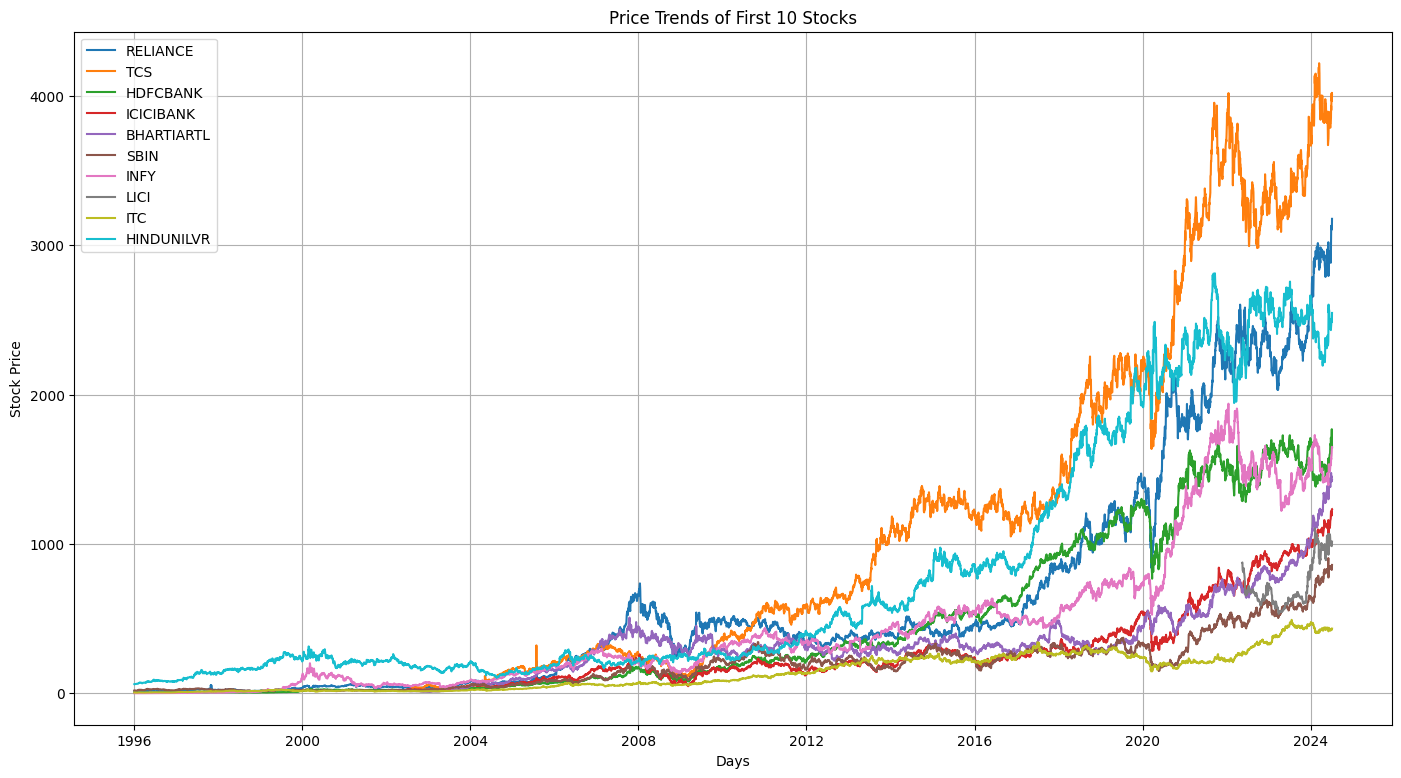

In [11]:
df_prices = pd.read_csv('/kaggle/input/nse-stock-historical-price-data/nse_all_stock_data (1).csv', index_col=0)
df_prices.index = pd.to_datetime(df_prices.index)
selected_stocks = df_prices.iloc[:, :10]

# Plotting the price trends of the first 10 stocks
plt.figure(figsize=(17, 9))

# Plot each stock's price trend as a line chart
for stock in selected_stocks.columns:
    plt.plot(selected_stocks.index, selected_stocks[stock], label=stock)

# Add plot titles and labels
plt.title('Price Trends of First 10 Stocks')
plt.xlabel('Days')
plt.ylabel('Stock Price')

# Add legend and grid
plt.legend(loc='upper left')
plt.grid(True)

# Show the plot
plt.show()


# **CORRELATION ANALYSIS**

* **Creating a correlation matrix of stock returns**

In [12]:
returns_df = df.pct_change().dropna()
correlation_matrix = returns_df.corr()
print("CORRELATION MATRIX OF STOCK RETURNS:")
print()
print(correlation_matrix)


CORRELATION MATRIX OF STOCK RETURNS:

            RELIANCE       TCS  HDFCBANK  ICICIBANK  BHARTIARTL      SBIN  \
RELIANCE    1.000000  0.334238  0.312595   0.323234    0.254980  0.378049   
TCS         0.334238  1.000000  0.129333   0.198919    0.165895  0.123870   
HDFCBANK    0.312595  0.129333  1.000000   0.435351    0.246510  0.453661   
ICICIBANK   0.323234  0.198919  0.435351   1.000000    0.358375  0.522027   
BHARTIARTL  0.254980  0.165895  0.246510   0.358375    1.000000  0.278031   
...              ...       ...       ...        ...         ...       ...   
DONEAR      0.092988  0.058163  0.114729   0.172062    0.094604  0.168352   
CAREERP     0.087273  0.026032  0.085209   0.144409    0.074941  0.144654   
INTLCONV    0.028643  0.019194  0.022436   0.016360    0.025578  0.042378   
SHREEPUSHK  0.069248  0.023215  0.076226   0.120126    0.067191  0.130518   
PRITIKAUTO  0.015102  0.015859  0.014597   0.021056    0.023976  0.024963   

                INFY      LICI       

* **Identifying the most correlated pairs of stocks**

In [13]:
correlation_pairs = correlation_matrix.unstack().sort_values(ascending=False)
most_correlated_pairs = correlation_pairs[correlation_pairs < 1].head(10)
print("Most Correlated Pairs of Stocks:")
print(most_correlated_pairs)

Most Correlated Pairs of Stocks:
TRENT       BEL           0.983471
BEL         TRENT         0.983471
VTL         BEL           0.982905
BEL         VTL           0.982905
CESC        BEL           0.981981
BEL         CESC          0.981981
            BAJFINANCE    0.980640
BAJFINANCE  BEL           0.980640
TRENT       VTL           0.974968
VTL         TRENT         0.974968
dtype: float64


* **Visualizing the correlations using a heatmap**

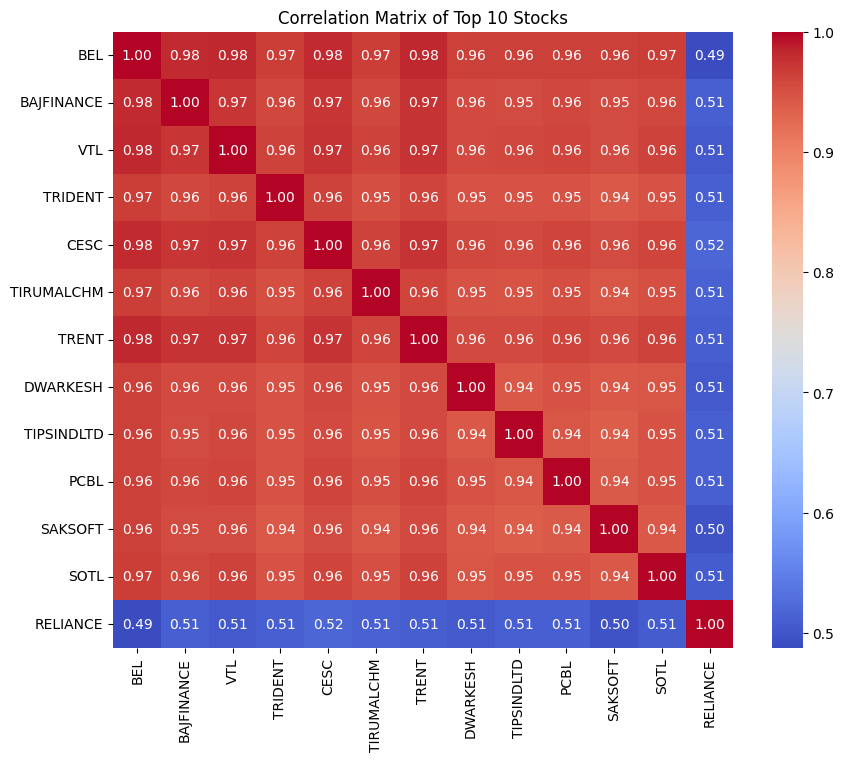

In [14]:
top_corr_pairs = correlation_matrix.unstack().sort_values(ascending=False).drop_duplicates()[:20]

# Extract stock names from the index
stocks = list(set([pair[0] for pair in top_corr_pairs.index] + [pair[1] for pair in top_corr_pairs.index]))

# Subset the correlation matrix for the top 10 stocks
top_corr_matrix = correlation_matrix.loc[stocks, stocks]

# Plot heatmap for the top 10 stocks with annotations for values
plt.figure(figsize=(10, 8))
sns.heatmap(top_corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Matrix of Top 10 Stocks')
plt.show()

# **TIME SERIES DECOMPOSITION**

* **Choosing one stock and perform time series decomposition**

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
stock_name = 'TCS'
stock_data = df[stock_name]
decomposition = seasonal_decompose(stock_data, model='additive', period=4)

* **Identifying trend, seasonality, and residual components**

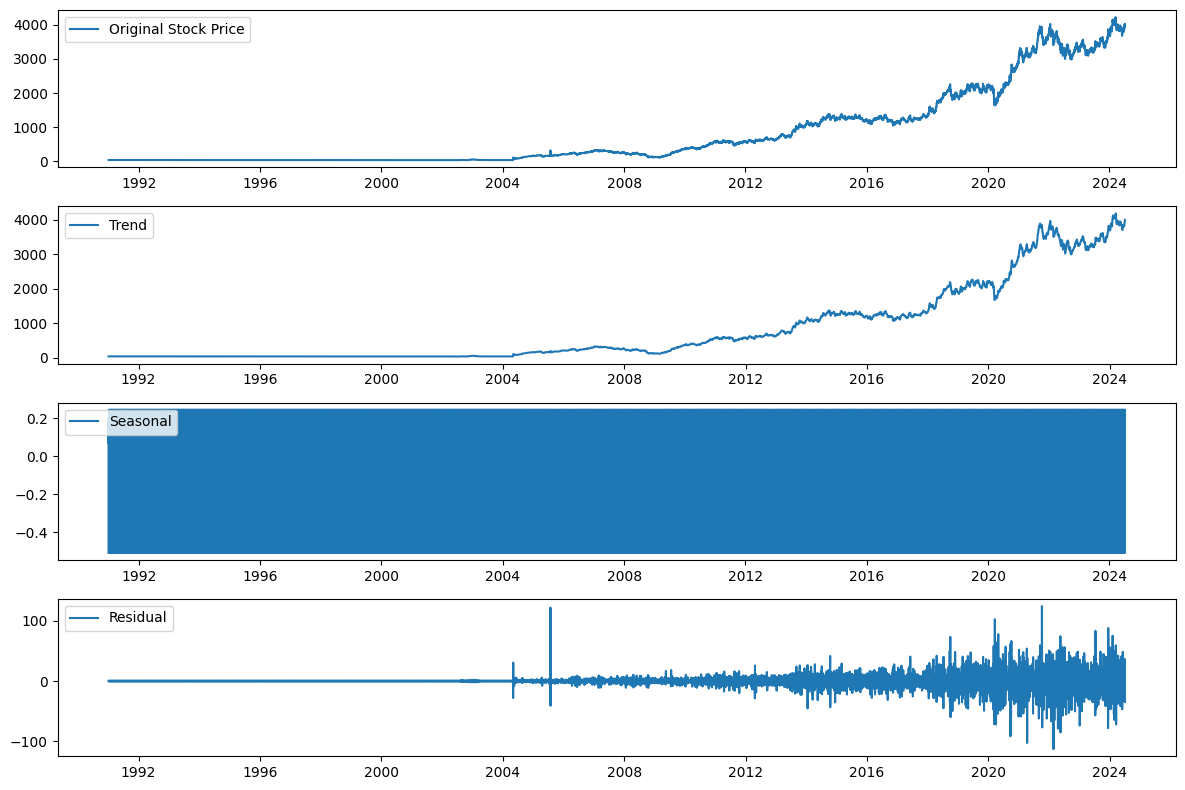

In [16]:
plt.figure(figsize=(12, 8))

#Plotting the original stock price for TCS
plt.subplot(411)
plt.plot(stock_data, label='Original Stock Price')
plt.legend(loc='upper left')

#Plotting the Trend Components for TCS
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='upper left')

#Plotting the Seasonal Components for TCS
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

#Plotting the Residual Components for TCS
plt.subplot(414)
plt.plot(decomposition.resid, label='Residual')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

* **Interpreting the results and their implications for trading**

**INTERPRETATION-**

*Original Stock Price*- Stats show an upward trend in stocks from 2004 to beyond 2024.

*Trend*: A steady upward pattern shows sustained growth in stock prices over the period analyzed.

*Seasonality*: Regular oscillations suggest predictable fluctuations over specific periods, potentially influenced by economic or seasonal factors.

*Residuals*: Random fluctuations around a central axis represent irregularities and unexpected movements in stock prices, possibly due to random events.

# **ANOMALY DETECTION**

* **DevelopIing a method to detect anomalous price movements**

In [17]:
def detect_anomalies_bb(data, window=20, std_dev_multiplier=2):
    rolling_mean = data.rolling(window=window).mean()
    rolling_std = data.rolling(window=window).std()

    upper_band = rolling_mean + (std_dev_multiplier * rolling_std)
    lower_band = rolling_mean - (std_dev_multiplier * rolling_std)

    anomalies = pd.DataFrame(index=data.index)
    anomalies['price'] = data
    anomalies['anomaly'] = (data > upper_band) | (data < lower_band)
    anomalies['deviation'] = np.abs(data - rolling_mean)
    return anomalies[anomalies['anomaly']]

stocks = pd.DataFrame({
    'Stock1': np.random.normal(100, 10, 100),
    'Stock2': np.random.normal(50, 5, 100),
    'Stock3': np.random.normal(75, 7, 100)
})

anomalies_by_stock = {}
for col in stocks.columns:
    anomalies_by_stock[col] = detect_anomalies_bb(stocks[col])

# Finding the top 5 most significant anomalies across all stocks
all_anomalies = pd.concat(anomalies_by_stock.values())
top_5_anomalies = all_anomalies.nlargest(5, 'deviation')
print("Top 5 Anomalies:")
print(top_5_anomalies)

Top 5 Anomalies:
         price  anomaly  deviation
50   74.322945     True  25.208687
75   77.982008     True  24.266371
99  122.140217     True  21.211167
44   81.812063     True  21.102828
48   80.158618     True  20.408090


In [18]:
def detect_anomalies_zscore(df, threshold_factor=3):
    anomalies = pd.DataFrame()
    anomaly_summary = {}

    for column in df.columns:
        # Calculate Z-scores
        mean = df[column].mean()
        std = df[column].std()
        z_scores = (df[column] - mean) / std
        
        # Define anomaly threshold
        anomaly_threshold = threshold_factor
        
        # Detect anomalies (absolute Z-score > threshold)
        column_anomalies = df[column][abs(z_scores) > anomaly_threshold]
        
        # Add to anomalies DataFrame
        anomalies = pd.concat([anomalies, column_anomalies], axis=1)
        
        # Summarize anomalies for each stock
        anomaly_summary[column] = {
            'Anomaly Count': len(column_anomalies),
            'Anomaly Values': column_anomalies.tolist(),
            'Mean': mean,
            'Standard Deviation': std,
            'Threshold': anomaly_threshold
        }
        
    return anomalies, anomaly_summary

# Detect anomalies using Z-scores
anomalies, anomaly_summary = detect_anomalies_zscore(returns_df, threshold_factor=3)

# Print anomaly summary
print("Anomalies Detected:")
print(anomalies)
print("\nAnomaly Summary:")

Anomalies Detected:
                     RELIANCE  TCS  HDFCBANK  ICICIBANK  BHARTIARTL      SBIN  \
1996-01-30 00:00:00  0.089867  NaN       NaN        NaN         NaN       NaN   
1996-02-02 00:00:00  0.108512  NaN       NaN        NaN         NaN  0.069058   
1996-02-05 00:00:00  0.083170  NaN       NaN        NaN         NaN       NaN   
1996-02-06 00:00:00 -0.083805  NaN       NaN        NaN         NaN       NaN   
1996-02-08 00:00:00  0.087379  NaN  0.062827        NaN         NaN       NaN   
...                       ...  ...       ...        ...         ...       ...   
2004-01-26 00:00:00       NaN  NaN       NaN        NaN         NaN       NaN   
2004-03-02 00:00:00       NaN  NaN       NaN        NaN         NaN       NaN   
2004-07-13 00:00:00       NaN  NaN       NaN        NaN         NaN       NaN   
2010-02-06 00:00:00       NaN  NaN       NaN        NaN         NaN       NaN   
2010-02-08 00:00:00       NaN  NaN       NaN        NaN         NaN       NaN   

       

* **Identifying and listing Top 5 most significant anomalies in the dataset**

In [19]:
#Identify top 5 anomalies
anomalies_count = {stock: summary['Anomaly Count'] for stock, summary in anomaly_summary.items()}
sorted_anomalies = sorted(anomalies_count.items(), key=lambda item: item[1], reverse=True)[:5]

#Print the top 5 anomalies
print("\nTop 5 Most Significant Anomalies:")
for stock, count in sorted_anomalies:
    print(f"{stock}: {count} anomalies")


Top 5 Most Significant Anomalies:
JITFINFRA: 495 anomalies
FOCUS: 442 anomalies
FCSSOFT: 402 anomalies
E2E: 398 anomalies
BALAXI: 398 anomalies


* **Investigate and explain possible reasons for these anomalies**

*Factors*: earnings reports, mergers and acquisitions, regulatory announcements, etc.

*Changes in Market Sentiment*: investor outlook, overall market patterns, geopolitical occurrences, or shifts in economic indicators, etc.

*Specific Stock Influences*: news related to individual companies such as product introductions, alterations in leadership, legal matters, etc.

*Financial Performance Updates*: quarterly or yearly financial outcomes that could greatly affect stock values.

*Business Decisions*: mergers, stock divisions, takeovers, etc